In [4]:
from IPython.display import HTML
# http://blog.nextgenetics.net/?e=102
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

## GLAO Effectiveness at ELT Sites
Do a comprehensive study of the GLAO effectiveness, in terms of Equivalent Noise Area (ENA) improvement as a function of:
* Site
* Off-axis distance
* 25%, 50%, 75% percentiles of seeing
* Wavelength
* DM conjugate height
* Zenith angle / r0 variance
* Account for telescope aberration

In [5]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [6]:
import numpy as np
from common_units import *

In [ ]:
import pandas as pd
store = pd.HDFStore('paper3.h5')
df = store['df_paper3']
store.close()
df

### Cost of having TMT DM at secondary instead of conjugate to ground

Compare Maunakea performance with DM at -390 vs Ground

<IPython.core.display.Javascript object>


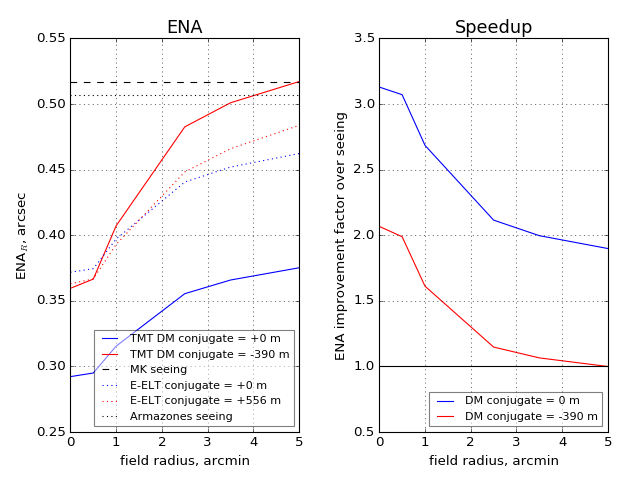

In [65]:
dfmk = df[df.Profile == 'Maunakea 13N median']
zcs = dfmk.wfs_conjugate.unique()

plt.subplot(121)
for zc in zcs:
    dft = dfmk[dfmk.wfs_conjugate == zc]
    if zc == 0:
        color = 'b'
    else:
        color = 'r'
    dfts = dft.sort_values(by='field_angle_r')
    x = list(dfts.field_angle_r)
    y = list(dfts.ENA_R)
    plt.plot(x,y,color,label=r'TMT DM conjugate = %+d m'%zc)
y = list(dfts.ENA_R_seeing)
plt.plot(x,y,'k--',label='MK seeing')

dfa = df[df.Profile == 'Armazones median']
zcs = dfa.wfs_conjugate.unique()
for zc in zcs:
    dft = dfa[dfa.wfs_conjugate == zc]
    if zc == 0:
        color = 'b'
    else:
        color = 'r'
    dfts = dft.sort_values(by='field_angle_r')
    x = list(dfts.field_angle_r)
    y = list(dfts.ENA_R)
    plt.plot(x,y,color+':',label='E-ELT conjugate = %+d m'%zc)

y = list(dfts.ENA_R_seeing)
plt.plot(x,y,'k:',label='Armazones seeing')

plt.legend(loc=4,fontsize=10,framealpha=.5)
plt.grid('on')
plt.xlabel('field radius, arcmin')
plt.ylabel(r'ENA$_R$, arcsec')
plt.title('ENA',fontsize=16)

plt.subplot(122)
df1 = dfmk[dfmk.wfs_conjugate == 0].sort_values(by='field_angle_r')
df2 = dfmk[dfmk.wfs_conjugate == -390].sort_values(by='field_angle_r')
x = list(df1.field_angle_r)
y1 = np.array(list(df1.ENA_R))
y2 = np.array(list(df2.ENA_R))
ys = np.array(list(df1.ENA_R_seeing))
plt.plot(x,(ys/y1)**2,'b',label='DM conjugate = 0 m')
plt.plot(x,(ys/y2)**2,'r',label='DM conjugate = -390 m')
plt.plot(x,np.ones(len(x)),'k')
plt.legend(loc=4,fontsize=10,framealpha=.5)
plt.xlabel('field radius, arcmin')
plt.ylabel(r'ENA improvement factor over seeing')
plt.grid('on')
#plt.ylim(1.,2.)
plt.title('Speedup',fontsize=16)

plt.subplots_adjust(top=0.92,bottom=0.1, left=0.11,right=0.95,hspace=0.25,wspace=0.35)

### Save data

In [70]:
df_all = pd.concat([df,dfc,df_test,df_test2])

In [73]:
p.dfSave(df_all,'df_paper3')

In [138]:
store = pd.HDFStore('paper3.h5')
if 'df' not in store:
    store['df'] = df
    store.get_storer('df').attrs.metadata = df.metadata
else:
    print 'WARNING - df is in store. opted not to write over'
store.close()

### Read data

In [147]:
store = pd.HDFStore('paper3.h5')
df = store['df']
df.metadata = store.get_storer('df').attrs.metadata
store.close()
print df.metadata
df

{'column_units': {'Profile': '', 'r00': 'm', 'theta0': 'arcsec', 'r0': 'm', 'field_angle': 'arcmin', 'h': 'm', 'seeing_as': 'arcsec', 'Site': '', 'r0_60m': 'm', 'warning': '', 'ENA_R_seeing': 'arcsec', 'tile': '', 'wavelength': 'microns', 'h_bar': 'm', 'Cn2': 'm^1/3 x1e14', 'ENA_R': 'arcsec'}}


Profile  wavelength       r00        r0      theta0  \
0              MK Imaka        0.55  0.214105  0.214105  270.961646   
1              MK Imaka        0.55  0.214105  0.214105  270.961646   
2              MK Imaka        0.55  0.214105  0.214105  270.961646   
3         Armazones 25%        0.55  0.281047  0.281047    2.757988   
4         Armazones 25%        0.55  0.281047  0.281047    2.757988   
5         Armazones 25%        0.55  0.281047  0.281047    2.757988   
6      Armazones median        0.55  0.215348  0.215348    2.192233   
7      Armazones median        0.55  0.215348  0.215348    2.192233   
8      Armazones median        0.55  0.215348  0.215348    2.192233   
9         Armazones 75%        0.55  0.160626  0.160626    1.699690   
10        Armazones 75%        0.55  0.160626  0.160626    1.699690   
11        Armazones 75%        0.55  0.160626  0.160626    1.699690   
12     Maunakea 13N 25%        0.55  0.277591  0.277591    3.413465   
13     Maunakea 13N 25%        0.55  0.277591  0.277591    3.413465   
14     Maunakea 13N 25%        0.55  0.277591  0.277591    3.413465   
15  Maunakea 13N median        0.55  0.211014  0.211014    2.677750   
16  Maunakea 13N median        0.55  0.211014  0.211014    2.677750   
17  Maunakea 13N median        0.55  0.211014  0.211014    2.677750   
18     Maunakea 13N 75%        0.55  0.154052  0.154052    2.031674   
19     Maunakea 13N 75%        0.55  0.154052  0.154052    2.031674   
20     Maunakea 13N 75%        0.55  0.154052  0.154052    2.031674   
21              ORM 25%        0.55  0.257816  0.257816    2.992507   
22              ORM 25%        0.55  0.257816  0.257816    2.992507   
23              ORM 25%        0.55  0.257816  0.257816    2.992507   
24           ORM median        0.55  0.200075  0.200075    2.488429   
25           ORM median        0.55  0.200075  0.200075    2.488429   
26           ORM median        0.55  0.200075  0.200075    2.488429   
27              ORM 75%        0.55  0.154679  0.154679    2.024413   
28              ORM 75%        0.55  0.154679  0.154679    2.024413   
29              ORM 75%        0.55  0.154679  0.154679    2.024413   

          h_bar  field_angle  ENA_R_seeing     ENA_R  \
0     51.198175            0      0.509433  0.030207   
1     51.198175           10      0.509433  0.061641   
2     51.198175           20      0.509433  0.095392   
3   6602.704176            0      0.388093  0.319613   
4   6602.704176           10      0.388093  0.324175   
5   6602.704176           20      0.388093  0.337661   
6   6364.875266            0      0.506492  0.451566   
7   6364.875266           10      0.506492  0.457464   
8   6364.875266           20      0.506492  0.474835   
9   6123.250169            0      0.679044  0.647154   
10  6123.250169           10      0.679044  0.654766   
11  6123.250169           20      0.679044  0.677040   
12  5269.203946            0      0.392924  0.246748   
13  5269.203946           10      0.392924  0.250741   
14  5269.203946           20      0.392924  0.262536   
15  5105.946592            0      0.516896  0.365522   
16  5105.946592           10      0.516896  0.370812   
17  5105.946592           20      0.516896  0.386489   
18  4913.016174            0      0.708023  0.557839   
19  4913.016174           10      0.708023  0.564987   
20  4913.016174           20      0.708023  0.586034   
21  5582.272107            0      0.423061  0.350187   
22  5582.272107           10      0.423061  0.355468   
23  5582.272107           20      0.423061  0.371165   
24  5209.580888            0      0.545157  0.465964   
25  5209.580888           10      0.545157  0.472398   
26  5209.580888           20      0.545157  0.491446   
27  4950.701407            0      0.705154  0.631942   
28  4950.701407           10      0.705154  0.639793   
29  4950.701407           20      0.705154  0.662868   

                                              warning  \
0                   

In [3]:
import pandas as pd
store = pd.HDFStore('paper3.h5')
df = store['df_paper3']
store.close()
df

Profile telescope  DM_conjugate  wfs_conjugate  wavelength  \
0              MK Imaka       TMT           0.0            0.0        0.55   
1         Armazones 25%     E-ELT           0.0            0.0        0.55   
2      Armazones median     E-ELT           0.0            0.0        0.55   
3         Armazones 75%     E-ELT           0.0            0.0        0.55   
4      Maunakea 13N 25%       TMT           0.0            0.0        0.55   
5   Maunakea 13N median       TMT           0.0            0.0        0.55   
6      Maunakea 13N 75%       TMT           0.0            0.0        0.55   
7               ORM 25%       TMT           0.0            0.0        0.55   
8            ORM median       TMT           0.0            0.0        0.55   
9               ORM 75%       TMT           0.0            0.0        0.55   
10             MK Imaka       TMT           0.0            0.0        0.55   
11        Armazones 25%     E-ELT           0.0            0.0        0.55   
12     Armazones median     E-ELT           0.0            0.0        0.55   
13        Armazones 75%     E-ELT           0.0            0.0        0.55   
14     Maunakea 13N 25%       TMT           0.0            0.0        0.55   
15  Maunakea 13N median       TMT           0.0            0.0        0.55   
16     Maunakea 13N 75%       TMT           0.0            0.0        0.55   
17              ORM 25%       TMT           0.0            0.0        0.55   
18           ORM median       TMT           0.0            0.0        0.55   
19              ORM 75%       TMT           0.0            0.0        0.55   
20             MK Imaka       TMT           0.0            0.0        0.55   
21        Armazones 25%     E-ELT           0.0            0.0        0.55   
22     Armazones median     E-ELT           0.0            0.0        0.55   
23        Armazones 75%     E-ELT           0.0            0.0        0.55   
24     Maunakea 13N 25%       TMT           0.0            0.0        0.55   
25  Maunakea 13N median       TMT           0.0            0.0        0.55   
26     Maunakea 13N 75%       TMT           0.0            0.0        0.55   
27              ORM 25%       TMT           0.0            0.0        0.55   
28           ORM median       TMT           0.0            0.0        0.55   
29              ORM 75%       TMT           0.0            0.0        0.55   
..                  ...       ...           ...            ...         ...   
0              Simple 1                   900.0          900.0        0.55   
1              Simple 1                   900.0          900.0        0.55   
2              Simple 1                   900.0          900.0        0.55   
3              Simple 1                   900.0          900.0        0.55   
4              Simple 1                   900.0          900.0        0.55   
5              Simple 1                   900.0          900.0        0.55   
0              Simple 2                     0.0            0.0        0.55   
1              Simple 2                     0.0            0.0        0.55   
2              Simple 2                     0.0            0.0        0.55   
3              Simple 2                     0.0            0.0        0.55   
4              Simple 2                     0.0            0.0        0.55   
5              Simple 2                     0.0            0.0        0.55   
0              Simple 2                   500.0          500.0        0.55   
1              Simple 2                   500.0          500.0        0.55   
2              Simple 2                   500.0          500.0        0.55   
3              Simple 2                   500.0          500.0        0.55   
4              Simple 2                   500.0          500.0        0.55   
5              Simple 2                   500.0          500.0        0.55   
0              Simple 2                  1000.0         1000.0        0.55   
1              Simple 2               

In [2]:
store.close()

### Read $C_n^2$ profiles

In [150]:
store = pd.HDFStore('Cn2_profiles.hd5')
dfo = store['df']
store.close()
dfo

Site    tile      GL   500m    1km    2km    4km    8km   16km  \
0     Armazones     25%   4.403  2.374  0.766  1.134  1.819  1.928  2.598   
1     Armazones  median   4.863  4.883  1.364  2.273  2.702  3.880  3.448   
2     Armazones     75%   5.088  9.790  2.669  4.398  3.760  7.778  4.682   
3  Maunakea 13N     25%   8.307  1.639  0.568  0.411  1.563  0.901  1.946   
4  Maunakea 13N  median  10.997  3.467  1.226  1.117  2.771  1.993  2.649   
5  Maunakea 13N     75%  14.846  7.605  2.841  3.033  4.295  4.601  3.697   
6           ORM     25%   4.781  3.146  1.697  1.127  1.949  2.775  1.870   
7           ORM  median   6.680  5.095  3.156  2.125  3.069  3.914  2.428   
8           ORM     75%   8.550  8.167  5.942  4.075  4.804  5.896  3.208   

   seeing_as  r0_60m  
0      0.403   0.251  
1      0.526   0.192  
2      0.705   0.143  
3      0.408   0.248  
4      0.537   0.188  
5      0.736   0.137  
6      0.440   0.230  
7      0.566   0.178  
8      0.733   0.138